In [2]:
## RUN THIS CELL
import torch
import torchvision
import torchvision.transforms as transforms

## Create Datasets

In [3]:
# create a transformation that changes are images to Tensors, 
# and then maps the images from the range [0, 1] to the range [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [4]:
## RUN THIS CELL
training_set = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform,
)

0it [00:00, ?it/s]

170500096it [00:50, 6354268.90it/s]                               

In [5]:
## RUN THIS CELL
test_set = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform,
)

Files already downloaded and verified


In [6]:
training_loader = torch.utils.data.DataLoader(
    training_set,
    batch_size=4,
    shuffle=True,
    num_workers=1,
)

In [7]:
test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=4,
    shuffle=False,
    num_workers=1,
)

In [8]:
## Classes in our dataset
classes = [
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
]

## Define our Network

In [9]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [10]:
## our network

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = ???
        self.pool1 = ???
        self.conv2 = ???
        self.pool2 = ???
        self.output_shape = ???
        self.fc1 = ???
        self.output_fc = ???
        
    def forward(self, x):
        ???

In [11]:
net = Net()

## Define the loss function and optimizer

In [12]:
import torch.optim as optim

In [13]:
loss_func = ???

In [14]:
optimizer = ???

## Train the network

In [15]:
NUM_EPOCHS = 1
PRINT_FREQ = 100

In [16]:
for epoch in range(NUM_EPOCHS):
    current_loss = 0.0
    
    for i, data in enumerate(training_loader, 0):
        inputs, labels = data
        
        ???
        
        current_loss += loss.item()
        if i % PRINT_FREQ == 0:
            print(f'[{epoch},{i}] loss: {current_loss / PRINT_FREQ:.3f}')
            current_loss = 0.0

[0,0] loss: 0.023
[0,100] loss: 2.301
[0,200] loss: 2.295
[0,300] loss: 2.278
[0,400] loss: 2.230
[0,500] loss: 2.150
[0,600] loss: 2.127
[0,700] loss: 2.045
[0,800] loss: 1.969
[0,900] loss: 1.989
[0,1000] loss: 1.976
[0,1100] loss: 1.945
[0,1200] loss: 1.864
[0,1300] loss: 1.924
[0,1400] loss: 1.846
[0,1500] loss: 1.916
[0,1600] loss: 1.855
[0,1700] loss: 1.840
[0,1800] loss: 1.850
[0,1900] loss: 1.758
[0,2000] loss: 1.719
[0,2100] loss: 1.762
[0,2200] loss: 1.764
[0,2300] loss: 1.747
[0,2400] loss: 1.821
[0,2500] loss: 1.713
[0,2600] loss: 1.792
[0,2700] loss: 1.725
[0,2800] loss: 1.722
[0,2900] loss: 1.801
[0,3000] loss: 1.738
[0,3100] loss: 1.730
[0,3200] loss: 1.758
[0,3300] loss: 1.651
[0,3400] loss: 1.580
[0,3500] loss: 1.614
[0,3600] loss: 1.654
[0,3700] loss: 1.619
[0,3800] loss: 1.563
[0,3900] loss: 1.585
[0,4000] loss: 1.704
[0,4100] loss: 1.573
[0,4200] loss: 1.582
[0,4300] loss: 1.612
[0,4400] loss: 1.562
[0,4500] loss: 1.571
[0,4600] loss: 1.553
[0,4700] loss: 1.618
[0,4

## Test network on the training data

In [20]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [21]:
accuracy = 100 * correct / total

In [22]:
print(f'Accuracy on the 10000 test images: {accuracy:.2f}')

Accuracy on the 10000 test images: 48.90


## Damn that sucks, what can we do better?

### Answer: Transfer Learning

In [23]:
# We want to use a pretrained imagenet model and transfer it to our CIFAR task.
# First we need to recreate our datasets so that the input images to the network "look like"
# imagenet images.
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
transform = transforms.Compose([
    transforms.Resize([224, 224]), #imagenet images are 224x224
    transforms.ToTensor(),
    transforms.Normalize( # pretrained network was trained with these params
        mean=mean,
        std=std, 
    ),
])

In [24]:
training_set = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform,
)

Files already downloaded and verified


In [25]:
test_set = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform,
)

Files already downloaded and verified


In [26]:
training_loader = torch.utils.data.DataLoader(
    training_set,
    batch_size=4,
    shuffle=True,
    num_workers=1,
)

In [27]:
test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=4,
    shuffle=False,
    num_workers=1,
)

## Now we pull in our pretrained network

In [28]:
## RUN THIS CELL
vgg16 = torchvision.models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/jamesbartlett/.torch/models/vgg16-397923af.pth

0it [00:00, ?it/s]
688128it [00:00, 6785066.51it/s]
1671168it [00:00, 7455130.20it/s]
2834432it [00:00, 8339068.92it/s]
4300800it [00:00, 9558190.09it/s]
5857280it [00:00, 10771774.60it/s]
7847936it [00:00, 12474614.09it/s]
9838592it [00:00, 13981481.06it/s]
11657216it [00:00, 15003896.52it/s]
13828096it [00:00, 16499657.41it/s]
15630336it [00:01, 16922328.65it/s]
17899520it [00:01, 18128958.81it/s]
20324352it [00:01, 19612056.48it/s]
22388736it [00:01, 18844703.71it/s]
24354816it [00:01, 18451789.70it/s]
26255360it [00:01, 16935521.16it/s]
28229632it [00:01, 17661547.46it/s]
30269440it [00:01, 18326487.86it/s]
32145408it [00:01, 18448623.88it/s]
34144256it [00:01, 18550501.29it/s]
36356096it [00:02, 19439616.91it/s]
38436864it [00:02, 19659927.61it/s]
40730624it [00:02, 20379487.85it/s]
42795008it [00:02, 19905586.87it/s]
44802048it [00:02, 19827120.66it/s]
4

In [29]:
# Now we want to make it so that gradients don't get calculated for the parameters
# in the pretrained model.
for param in vgg16.parameters():
    ???

In [30]:
vgg16.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [31]:
# Now we want to change the final fully connected layer in the model
# since imagenet has 1000 classes and we only want to predict 10

# get number of input features to last layer
num_features = vgg16.classifier[6].in_features
# overwrite existing fc with new one
vgg16.classifier[6] = nn.Linear(num_features, 10)

In [33]:
# look at a summary of our network
import torchsummary
torchsummary.summary(vgg16, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [34]:
## Now we need to copy our code for the loss function, training, etc from above
# NOTE: it would have been better practice to make that code into functions so that
# we wouldn't have to copy and paste code around.

In [35]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.parameters(), lr=0.001, momentum=0.9)

In [36]:
PRINT_FREQ = 20
from tqdm import tqdm
for epoch in range(NUM_EPOCHS):
    current_loss = 0.0
    pbar = tqdm(enumerate(training_loader, 0), total=len(training_loader))
    for i, data in pbar:
        inputs, labels = data

        ???

        current_loss += loss.item()
        if i % PRINT_FREQ == 0:
            pbar.set_description(f'loss: {current_loss / PRINT_FREQ:.3f}')
            current_loss = 0.0


loss: 1.378:   2%|▏         | 223/12500 [06:53<6:43:12,  1.97s/it]


loss: 0.880:   4%|▎         | 446/12500 [13:25<5:39:51,  1.69s/it]


loss: 1.279:   5%|▍         | 600/12500 [17:43<5:25:32,  1.64s/it]

KeyboardInterrupt: 

In [39]:
# Test Model on Test data
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = vgg16(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if total > 100:
            break
accuracy = 100 * correct / total
print(f'Accuracy on the {total} test images: {accuracy:.2f}')

Accuracy on the 104 test images: 70.19


In [ ]:
# Save model
## Save the model
torch.save(
    {
        'epoch': 1,
        'state_dict': vgg16.state_dict(),
        'optimizer' : optimizer.state_dict(),
    },
    'model.pth.tar'
)

In [37]:
# load model
def load_model(filename):
    checkpoint = torch.load(filename, map_location='cpu')
    vgg16.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])

In [38]:
load_model('model.pth.tar')

In [40]:
dataiter = iter(test_loader)

In [41]:
images, labels = dataiter.next()

In [42]:
import matplotlib.pyplot as plt

In [43]:
def inverse_transform(img):
    print(img.shape)
    npimg = img.numpy()
    npimg = npimg * np.array(std).reshape((-1, 1, 1)) + np.array(mean).reshape((-1, 1, 1))
    return np.transpose(npimg, (1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 228, 906])


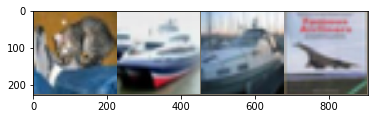

In [44]:
plt.imshow(inverse_transform(torchvision.utils.make_grid(images)))

In [45]:
print(' '.join(classes[label] for label in labels))

cat ship ship plane


In [46]:
outputs = vgg16(images)

In [47]:
_, predicted = torch.max(outputs.data, 1)

In [48]:
print(' '.join(classes[label] for label in predicted))

dog car ship plane
